In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('HR_Data.csv')

In [5]:
data.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [7]:
data.shape

(2000000, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [11]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
data['Hire_Date']=pd.to_datetime(data['Hire_Date'])

In [15]:
data['Performance_Rating'].unique()

array([5, 2, 1, 4, 3], dtype=int64)

In [17]:
data['Performance_Rating'].value_counts()

Performance_Rating
4    400529
2    400174
3    399814
1    399756
5    399727
Name: count, dtype: int64

In [19]:
data['Performance_Rating'].mean()

3.0001485

In [21]:
data['Experience_Years'].nunique()

16

In [23]:
data['Experience_Years'].unique()

array([14,  7,  2,  1,  0,  4,  9,  5,  6,  8,  3, 10, 11, 12, 13, 15],
      dtype=int64)

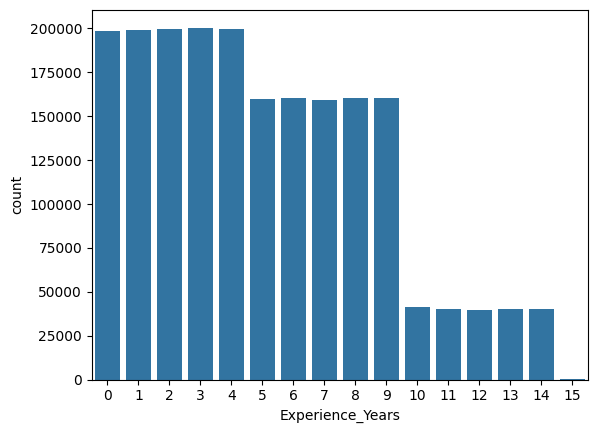

In [25]:
sns.countplot( x= 'Experience_Years',data=data)
plt.show()

In [27]:
data['Experience_Years'].value_counts()

Experience_Years
3     200522
2     199924
4     199866
1     199162
0     198775
6     160410
9     160223
8     160212
5     160112
7     159005
10     41209
13     40149
11     40146
14     40005
12     39709
15       571
Name: count, dtype: int64

In [29]:
data.select_dtypes(include='object')

,Employee_ID,Full_Name,Department,Job_Title,Location,Status,Work_Mode
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,"Isaacland, Denmark",Resigned,On-site
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,"Anthonyside, Costa Rica",Active,On-site
2,EMP0000003,Alyssa Martinez,HR,HR Manager,"Port Christinaport, Saudi Arabia",Active,On-site
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,"Port Shelbychester, Antigua and Barbuda",Active,On-site
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,"Lake Kimberly, Palestinian Territory",Active,On-site
...,...,...,...,...,...,...,...
1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,"Casefurt, Serbia",Active,Remote
1999996,EMP1999997,Tracey Smith,IT,Software Engineer,"Dannyport, Kuwait",Active,On-site
1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,"Craighaven, Nigeria",Active,Remote
1999998,EMP1999999,Michael Roberson,IT,Software Engineer,"Jonathanmouth, Djibouti",Retired,On-site


In [31]:
data.select_dtypes(include='number')

,Performance_Rating,Experience_Years,Salary_INR
0,5,14,1585363
1,2,7,847686
2,1,2,1430084
3,1,1,990689
4,5,0,535082
...,...,...,...
1999995,3,14,657648
1999996,3,4,1030109
1999997,5,1,1313085
1999998,4,2,1479727


### Q.1) What is the distribution of Employee Status( Active,Resigned,Retired,Terminated).

In [33]:
series=data['Status'].value_counts()
series

Status
Active        1401558
Resigned       398660
Retired         99912
Terminated      99870
Name: count, dtype: int64

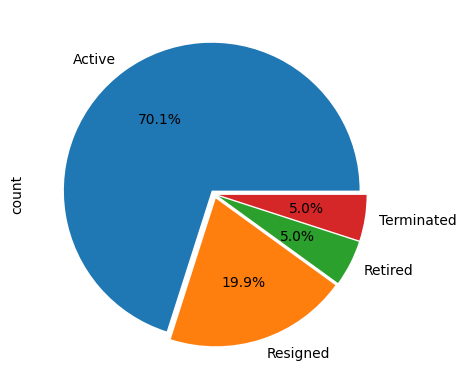

In [35]:
series.plot(kind='pie', color='mygr',autopct='%1.1f%%',explode=(0.03,0.03,0.03,0.03))
plt.show()

### Q.2) What is the distribution of work modes(on-site, Remote).

In [37]:
Work_Mode=data['Work_Mode'].value_counts()
Work_Mode

Work_Mode
On-site    1199109
Remote      800891
Name: count, dtype: int64

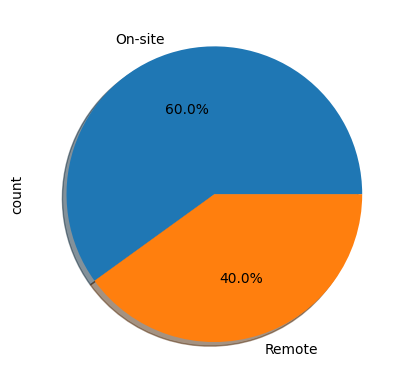

In [39]:
Work_Mode.plot(kind='pie',color='cr', autopct='%1.1f%%',shadow=True)
plt.show()

### Q.3) How many employees are there in each department.

In [41]:
department=data['Department'].value_counts()
department

Department
IT            601042
Sales         400031
Operations    300095
Marketing     240081
Finance       199873
HR            159119
R&D            99759
Name: count, dtype: int64

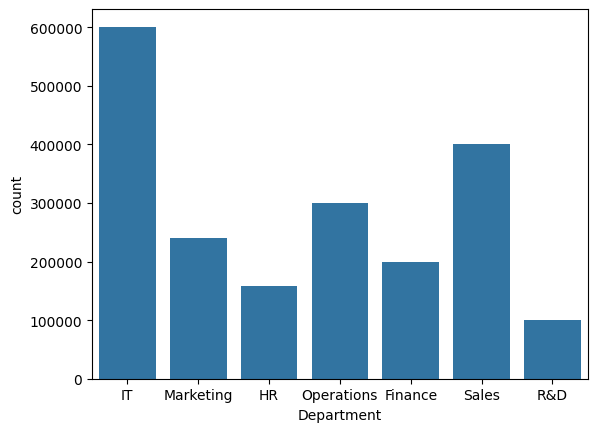

In [43]:
sns.countplot(x='Department', data=data)
plt.show()

In [45]:
data['Job_Title'].value_counts()

Job_Title
Software Engineer                300358
Sales Executive                  199982
Operations Executive             150058
Data Analyst                     120375
Marketing Executive              120154
Account Manager                  119929
Accountant                       100307
DevOps Engineer                   90197
Logistics Coordinator             90188
HR Executive                      79348
SEO Specialist                    71692
Business Development Manager      60233
IT Manager                        60224
Financial Analyst                 59815
Research Scientist                50017
Talent Acquisition Specialist     47994
Supply Chain Manager              44935
Content Strategist                36154
CTO                               29888
Product Developer                 29872
Finance Manager                   29799
HR Manager                        23841
Sales Director                    19887
Operations Director               14914
Lab Technician                

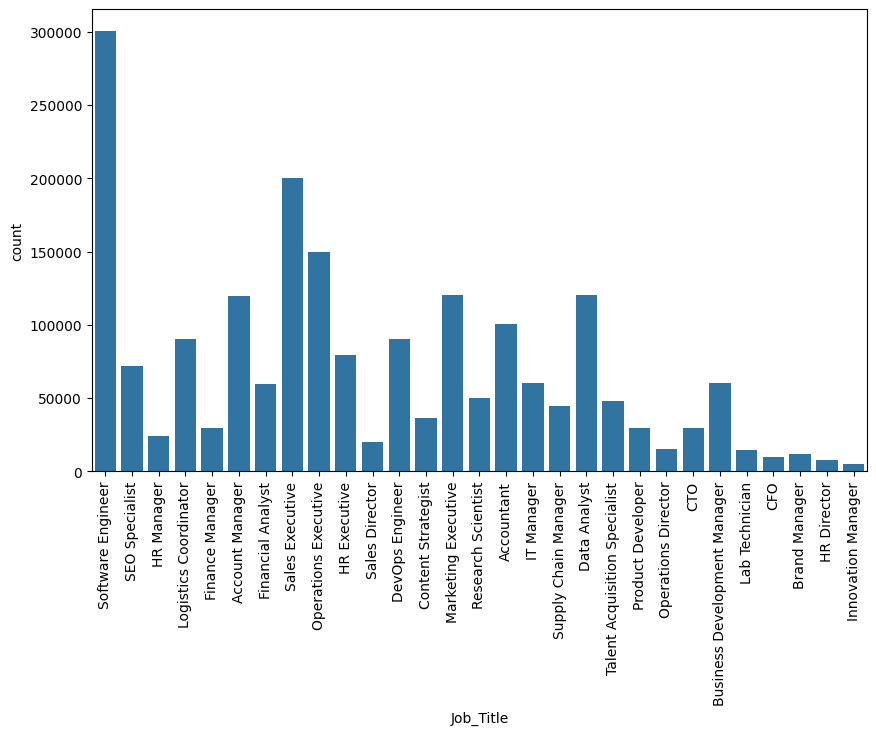

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='Job_Title', data=data)
plt.xticks(rotation=90)
plt.show()

### Q.4) What is the average salary by Department.

In [55]:
dept=data.groupby('Department')['Salary_INR'].mean()
dept

Department
Finance       9.404117e+05
HR            7.438536e+05
IT            1.129858e+06
Marketing     7.699362e+05
Operations    7.546263e+05
R&D           8.003772e+05
Sales         7.929579e+05
Name: Salary_INR, dtype: float64

In [51]:
type(dept)

pandas.core.series.Series

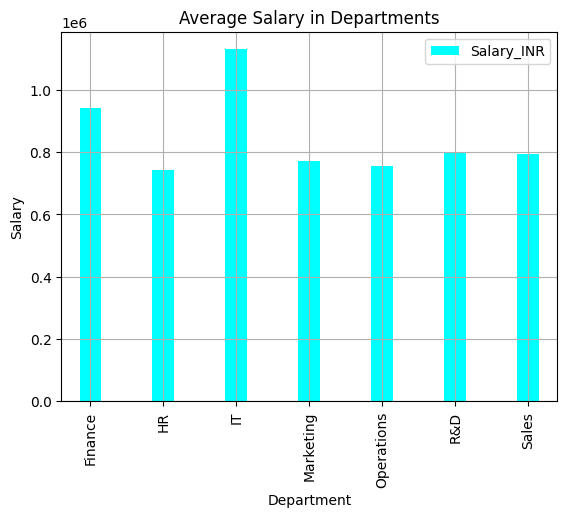

In [57]:
dept.plot(x=dept.index, y=dept.values, kind='bar',color='cyan',legend=True, width=0.3)
plt.grid()
plt.title('Average Salary in Departments')
plt.ylabel('Salary')
plt.show()

### Q.5) Whuch job title has the highest average salary.

In [59]:
salary=data.groupby('Job_Title')['Salary_INR'].mean()
salary

Job_Title
Account Manager                  7.993737e+05
Accountant                       6.500765e+05
Brand Manager                    8.031278e+05
Business Development Manager     1.252016e+06
CFO                              7.950159e+05
CTO                              8.014028e+05
Content Strategist               8.007600e+05
Data Analyst                     8.009964e+05
DevOps Engineer                  7.999492e+05
Finance Manager                  1.743242e+06
Financial Analyst                1.051523e+06
HR Director                      8.006944e+05
HR Executive                     5.505489e+05
HR Manager                       1.252402e+06
IT Manager                       2.098156e+06
Innovation Manager               8.018701e+05
Lab Technician                   8.001815e+05
Logistics Coordinator            6.496317e+05
Marketing Executive              7.987804e+05
Operations Director              7.982981e+05
Operations Executive             8.003509e+05
Product Developer       

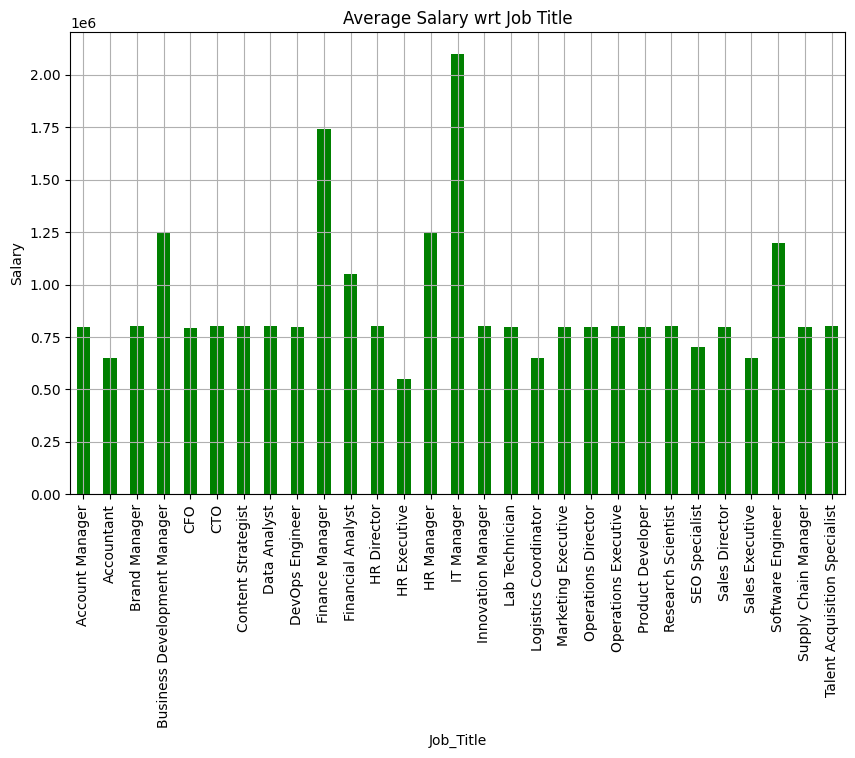

In [61]:
plt.figure(figsize=(10,6))
salary.plot(x=salary.index, y=salary.values, kind='bar',color='g')
plt.grid()
plt.title('Average Salary wrt Job Title')
plt.ylabel('Salary')
plt.show()
    

### Q.6) What is the average salary in different Departments based on Job Title.

In [63]:
dept_job=data.groupby(['Department','Job_Title'])['Salary_INR'].mean()
dept_job

Department  Job_Title                    
Finance     Accountant                       6.500765e+05
            CFO                              7.950159e+05
            Finance Manager                  1.743242e+06
            Financial Analyst                1.051523e+06
HR          HR Director                      8.006944e+05
            HR Executive                     5.505489e+05
            HR Manager                       1.252402e+06
            Talent Acquisition Specialist    8.014222e+05
IT          CTO                              8.014028e+05
            Data Analyst                     8.009964e+05
            DevOps Engineer                  7.999492e+05
            IT Manager                       2.098156e+06
            Software Engineer                1.199261e+06
Marketing   Brand Manager                    8.031278e+05
            Content Strategist               8.007600e+05
            Marketing Executive              7.987804e+05
            SEO Specialist    

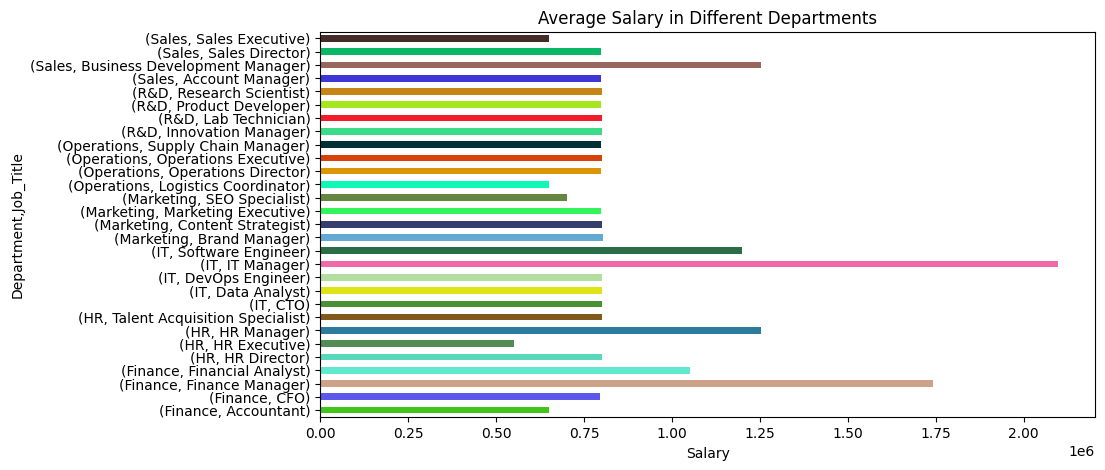

In [65]:
import random
num_bars=len(dept_job)
random_colors=[f'#{random.randint(0,0xFFFFFF):06x}' for _ in range(num_bars)]
dept_job.plot(kind='barh',figsize=(10,5),color= random_colors)
plt.title('Average Salary in Different Departments')
plt.xlabel('Salary')
plt.show()

### Q.7) How many employees Resigned & Terminated in each department.

In [67]:
data['Status'].unique()

array(['Resigned', 'Active', 'Terminated', 'Retired'], dtype=object)

In [69]:
data_resigned=data[data['Status']=='Resigned']
data_resigned.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
8,EMP0000009,Cathy Thompson,Finance,Financial Analyst,2018-05-29,"South Catherine, Belize",4,7,Resigned,Remote,1138452
11,EMP0000012,Kevin Lowe,Sales,Account Manager,2024-07-02,"East Kent, Qatar",3,1,Resigned,On-site,1111759
16,EMP0000017,Robert Martin,Operations,Logistics Coordinator,2025-05-13,"Laurahaven, Afghanistan",3,0,Resigned,On-site,859025
19,EMP0000020,Donald Hoffman,Marketing,Content Strategist,2022-04-01,"South James, New Zealand",3,3,Resigned,On-site,965154


In [71]:
R_employee=data_resigned.groupby('Department')['Status'].count()
R_employee

Department
Finance        40238
HR             31736
IT            119852
Marketing      47793
Operations     59397
R&D            19919
Sales          79725
Name: Status, dtype: int64

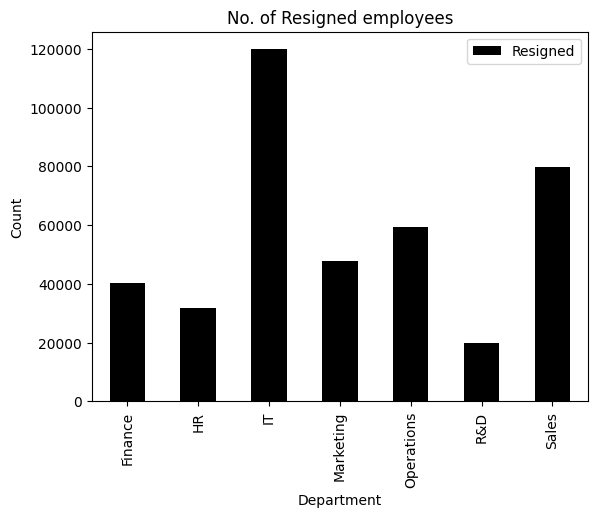

In [73]:
R_employee.plot(x=R_employee.index, y=R_employee.values, kind='bar',color='black',legend=True, label='Resigned')
plt.title('No. of Resigned employees')
plt.ylabel('Count')
plt.show()

In [75]:
data_Terminated=data[data['Status']=='Terminated']
data_Terminated.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
20,EMP0000021,Mr. Billy Rodgers DDS,Marketing,Marketing Executive,2017-10-12,"West Bryanton, Saint Martin",3,7,Terminated,On-site,796532
33,EMP0000034,Steve Carlson,IT,Software Engineer,2020-04-25,"Grahamfurt, Jamaica",5,5,Terminated,On-site,1039192
56,EMP0000057,Claire Martinez,IT,DevOps Engineer,2020-01-17,"Garciaton, Libyan Arab Jamahiriya",5,5,Terminated,Remote,838341
100,EMP0000101,Johnny Shepard,Finance,Accountant,2023-02-02,"North Briannatown, Cuba",4,2,Terminated,On-site,892140
121,EMP0000122,Vanessa Brown,IT,Data Analyst,2017-08-14,"South Teresa, Liechtenstein",3,8,Terminated,On-site,495474


In [77]:
T_employee=data_Terminated.groupby('Department')['Status'].count()
T_employee

Department
Finance        9988
HR             7861
IT            29881
Marketing     12044
Operations    14884
R&D            4998
Sales         20214
Name: Status, dtype: int64

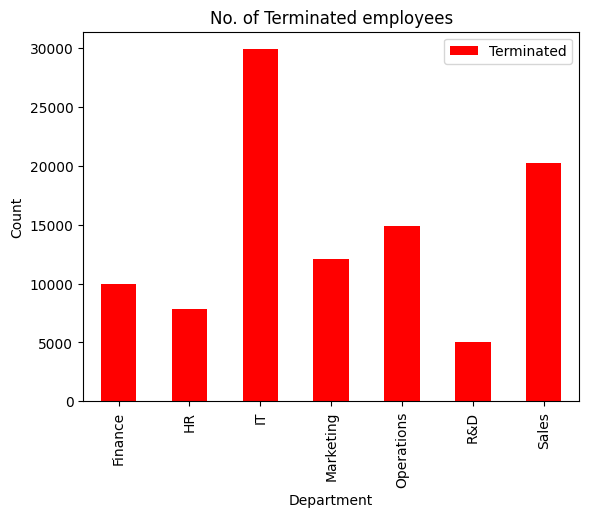

In [79]:
T_employee.plot(x=T_employee.index, y=T_employee.values, kind='bar',color='red',legend=True, label='Terminated')
plt.title('No. of Terminated employees')
plt.ylabel('Count')
plt.show()

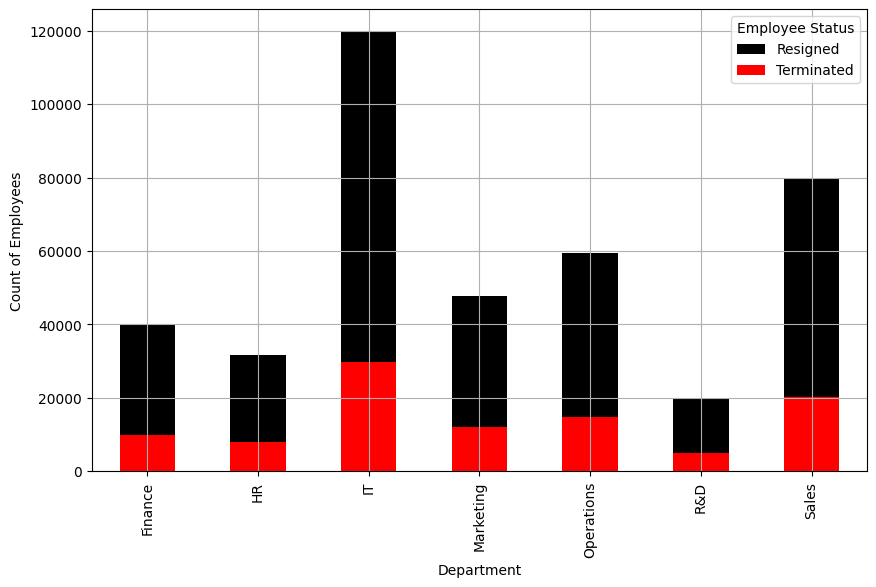

In [81]:
plt.figure(figsize=(10,6))
R_employee.plot(x=R_employee.index, y=R_employee.values, kind='bar',color='black',legend=True, label='Resigned')
T_employee.plot(x=T_employee.index, y=T_employee.values, kind='bar',color='red',legend=True, label='Terminated')
plt.legend(title='Employee Status')
plt.ylabel('Count of Employees')           
plt.grid()
plt.show()

### Q.8) How does salary vary with years of experiance.

In [83]:
data.groupby('Experience_Years')['Salary_INR'].mean()

Experience_Years
0     896737.454775
1     895903.759824
2     896755.652313
3     896861.245240
4     897944.573965
5     896484.084828
6     896012.632467
7     895722.673960
8     897148.361090
9     898482.940577
10    895662.027882
11    901452.750112
12    896432.933416
13    898790.197041
14    895610.790251
15    895647.401051
Name: Salary_INR, dtype: float64

### Q.9) What is the average performance rating by department.

In [85]:
PR=data.groupby('Department')['Performance_Rating'].mean()
PR

Department
Finance       2.996818
HR            2.995670
IT            2.998216
Marketing     3.004736
Operations    2.996081
R&D           3.001885
Sales         3.006362
Name: Performance_Rating, dtype: float64

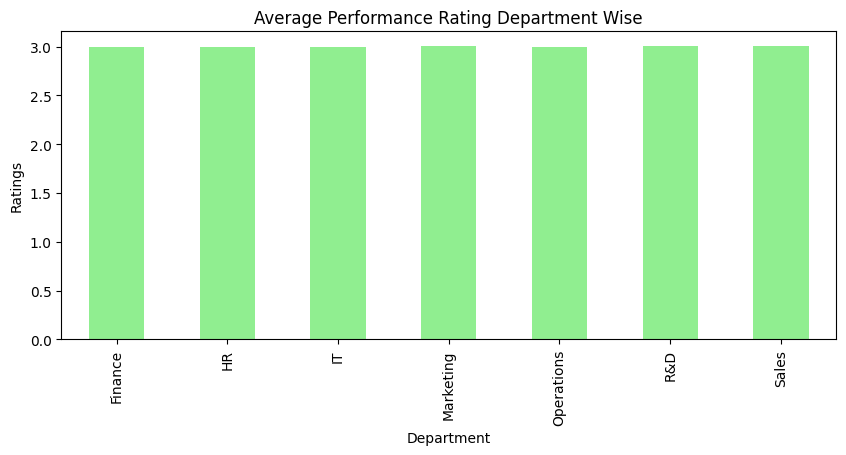

In [87]:
plt.figure(figsize=(10,4))
PR.plot(x=PR.index,y=PR.values,kind='bar', color='lightgreen')
plt.title('Average Performance Rating Department Wise')
plt.ylabel('Ratings')
plt.show()

### Q.10) Which Country have highest concentration of employees.

In [53]:
data.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [89]:
data['Country']=data['Location'].apply(lambda x:str(x.split(',')[1]))

In [91]:
data['Country'].nunique()

243

In [93]:
data.Country.value_counts()

Country
Congo                     16286
Korea                     16285
Sri Lanka                  8409
Switzerland                8391
British Virgin Islands     8373
                          ...  
Guinea-Bissau              7983
Kazakhstan                 7973
Montenegro                 7972
Bhutan                     7971
Palestinian Territory      7895
Name: count, Length: 243, dtype: int64

### Q.11) Is there a corralation between performance rating and salary.

In [95]:
data['Performance_Rating'].corr(data['Salary_INR'])

-0.00020919799940916518

In [97]:
data[['Performance_Rating','Salary_INR']].corr()

,Performance_Rating,Salary_INR
Performance_Rating,1.000000,-0.000209
Salary_INR,-0.000209,1.000000


<Axes: >

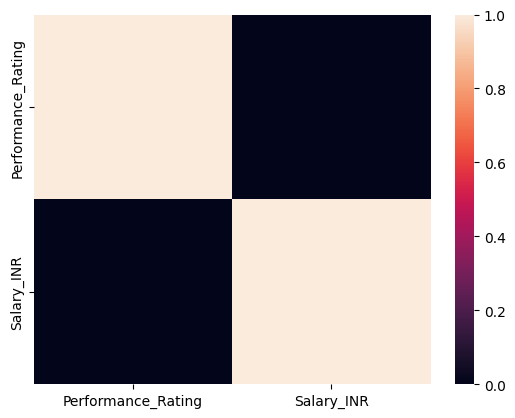

In [99]:
sns.heatmap(data[['Performance_Rating','Salary_INR']].corr())

##### There is no correlation between these two columns

### Q.12) How has the number of hires changed over time(per year).

In [101]:
data.Hire_Date.dtype

dtype('<M8[ns]')

In [64]:
data.head(2)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica


In [103]:
data.insert(5,'Year',data.Hire_Date.dt.year)

In [107]:
data.Year.unique()

array([2011, 2018, 2023, 2024, 2021, 2016, 2020, 2015, 2025, 2022, 2017,
       2019, 2014, 2013, 2012, 2010])

In [109]:
data.Year.nunique()

16

In [111]:
hire=data.groupby('Year')['Employee_ID'].count()
hire

Year
2010     15520
2011     40089
2012     39765
2013     39988
2014     40202
2015     85984
2016    160249
2017    160363
2018    159658
2019    160202
2020    175460
2021    199366
2022    201373
2023    198982
2024    200001
2025    122798
Name: Employee_ID, dtype: int64

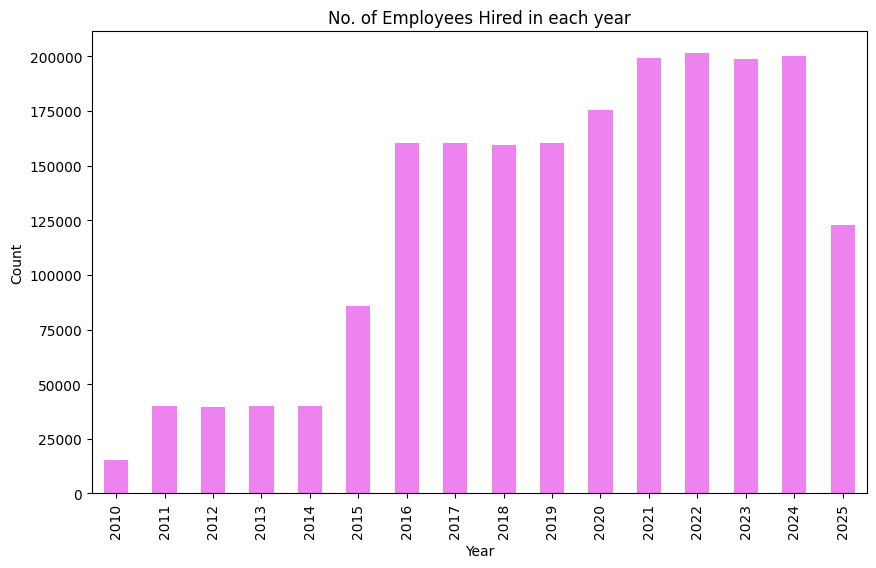

In [113]:
plt.figure(figsize=(10,6))
hire.plot(x=hire.index,y=hire.values,kind='bar',color='violet')
plt.title('No. of Employees Hired in each year')
plt.ylabel('Count')
plt.show()

### Q.13) Compare salaries of Remote vs. On-site employees ---  Is there a significance difference.

In [115]:
data.groupby('Work_Mode')['Salary_INR'].mean()

Work_Mode
On-site    896835.945792
Remote     896965.326373
Name: Salary_INR, dtype: float64

##### There is no significance difference.

### Q.14) Find the top 10 employees with the highest salary in each departmant.

In [117]:
top_10=data.groupby('Department').apply(lambda x: x.nlargest(10,'Salary_INR'))

C:\Users\user\AppData\Local\Temp\ipykernel_2680\356273361.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10=data.groupby('Department').apply(lambda x: x.nlargest(10,'Salary_INR'))


In [119]:
top_10.head(30)

Employee_ID           Full_Name Department  \
Department                                                      
Finance    888712   EMP0888713   Christopher Sloan    Finance   
           695808   EMP0695809        Todd Rodgers    Finance   
           459273   EMP0459274        Angela Payne    Finance   
           750893   EMP0750894           Nina Lara    Finance   
           780290   EMP0780291   Brittany Thompson    Finance   
           1316795  EMP1316796        Larry Wilson    Finance   
           737507   EMP0737508    Alexis Schroeder    Finance   
           781352   EMP0781353         Sarah Jones    Finance   
           803785   EMP0803786       Jose Anderson    Finance   
           905337   EMP0905338  Jennifer Dominguez    Finance   
HR         223845   EMP0223846         Ethan Jones         HR   
           1068270  EMP1068271         Austin Hall         HR   
           1541972  EMP1541973       Daniel Wilson         HR   
           1861401  EMP1861402      Amanda Everett         HR   
           553718   EMP0553719     Michelle Snyder         HR   
           674999   EMP0675000     Andre Velasquez         HR   
           230232   EMP0230233        Carrie Davis         HR   
           1489953  EMP1489954     Gregory Pearson         HR   
           1863268  EMP1863269    Dr. Shawn Gibson         HR   
           1708267  EMP1708268          Anna Munoz         HR   
IT         1697605  EMP1697606       Kathryn Owens         IT   
           1284141  EMP1284142       Robert Bowman         IT   
           1912378  EMP1912379   Christina Delgado         IT   
           1904593  EMP1904594        Donald Cohen         IT   
           645146   EMP0645147   Brandon Rodriguez         IT   
           766571   EMP0766572  Dr. David Mitchell         IT   
           1257897  EMP1257898   Cassandra Morales         IT   
           1734354  EMP1734355        Debra Rivera         IT   
           369339   EMP0369340        Douglas Mann         IT   
           1645827  EMP1645828   Jennifer Reynolds         IT   

                          Job_Title  Hire_Date  Year  \
Department                                             
Finance    888712   Finance Manager 2011-07-19  2011   
           695808   Finance Manager 2019-12-27  2019   
           459273   Finance Manager 2021-08-12  2021   
           750893   Finance Manager 2021-10-19  2021   
           780290   Finance Manager 2021-07-23  2021   
           1316795  Finance Manager 2015-01-30  2015   
           737507   Finance Manager 2024-10-28  2024   
           781352   Finance Manager 2018-04-02  2018   
           803785   Finance Manager 2020-11-17  2020   
           905337   Finance Manager 2018-03-22  2018   
HR         223845        HR Manager 2021-03-09  2021   
           1068270       HR Manager 2017-10-04  2017   
           1541972       HR Manager 2025-04-18  2025   
           1861401       HR Manager 2010-09-29  2010   
           553718        HR Manager 2018-04-06  2018   
           674999        HR Manager 2021-08-03  2021   
           230232        HR Manager 2025-05-30  2025   
           1489953       HR Manager 2022-03-06  2022   
           1863268       HR Manager 2022-05-13  2022   
           1708267       HR Manager 2019-08-06  2019   
IT         1697605       IT Manager 2018-02-22  2018   
           1284141       IT Manager 2010-10-14  2010   
           1912378       IT Manager 2018-06-24  2018   
           1904593       IT Manager 2017-11-21  2017   
           645146        IT Manager 2016-09-11  2016   
           766571        IT Manager 2019-10-07  2019   
           1257897       IT Manager 2023-08-09  2023   
           1734354       IT Manager 2022-06-13  2022   
           369339        IT Manager 2021-12-22  2021   
           1645827       IT Manager 2021-02-05  2021   

                                                   Location  \
Department                                                    
Finance    888712  

### Q.15) Identify departments with the highest attrition rate(Resigned %)

In [121]:
dept_counts=data.groupby('Department')['Status'].agg(total_emp='count', resigned=lambda x: (x=='Resigned').sum())
dept_counts

,total_emp,resigned
Department,,
Finance,199873,40238
HR,159119,31736
IT,601042,119852
Marketing,240081,47793
Operations,300095,59397
R&D,99759,19919
Sales,400031,79725


In [139]:
dept_counts['attrition_rate']= (dept_counts['resigned']/dept_counts['total_emp'])*100

In [141]:
dept_counts

,total_emp,resigned,attrition_rate
Department,,,
Finance,199873,40238,20.131784
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732
R&D,99759,19919,19.967121
Sales,400031,79725,19.929705


In [143]:
dept_counts.sort_values(by='attrition_rate', ascending=False)

,total_emp,resigned,attrition_rate
Department,,,
Finance,199873,40238,20.131784
R&D,99759,19919,19.967121
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Sales,400031,79725,19.929705
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732
